In [2]:
from PIL import Image
import numpy as np
import os
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
# 支持中文，高清显示
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [3]:
def d_ou(v1,v2):  #np.dot(v1,v2) == np.sum(v1*v2)
    v1=np.array(v1)
    v2=np.array(v2)
    return np.sqrt(np.dot((v1-v2),(v1-v2)))
    #return np.sqrt(np.sum((v1-v2)*(v1-v2)))

In [4]:
def LoadData(path):
    files = os.listdir(path)
    flag = 1
    for i in range(len(files)):
        currentFile = path+str(i)+".jpg"
        #print(currentFile)
        img = Image.open(currentFile)
        imgGray = img.convert('L')
        imgArray =  np.array(imgGray)
        if (flag == 1):
            flag = 0
            data = imgArray.reshape([1, -1])
        else:
            data = np.append(data, imgArray.reshape([1, -1]), axis = 0)
    return data
path = "DataProcessed/train/"
data = LoadData(path)
print("读取数据完成，数据大小为", data.shape)

读取数据完成，数据大小为 (100, 2500)


In [28]:
# 手写
def PCAHandwrite(X, num_components):
    # 去中心化
    X_meaned = X - np.mean(X, axis=0)
    # 计算协方差矩阵
    cov_mat = np.cov(X_meaned, rowvar=False)
    # 计算特征值和特征向量
    eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
    # 对特征值排序
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    # 取前 num_components 个特征向量
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]
    # 转换数据到新空间
    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()
    return X_reduced,eigenvector_subset
#输入数据 X 和要保留的主成分数 num_components。
#函数会首先对数据进行去中心化处理，然后计算协方差矩阵，接着求解特征值和特征向量，对特征值进行排序，选择前 num_components 个特征向量，
#最后将数据投影到这些特征向量所构成的新空间。函数返回投影后的数据 X_reduced。

def InversePCAHandwrite(X_reduced, eigenvectors, X_mean):
    # 将数据从新空间转换回原始空间
    X_original = np.dot(eigenvectors, X_reduced.T).T
    # 重新添加均值
    X_original = X_original + X_mean
    return np.real(X_original)
#函数接受三个参数：PCA主成分分析后得到的降维后的数据 X_reduced，
#PCA主成分分析得到的特征向量 eigenvectors，以及 PCA 主成分分析前原始数据的均值 X_mean。
#函数将数据从新空间转换回原始空间，然后重新添加均值，最后返回原始数据。

processedTrain,eigenvector_subset = PCAHandwrite(data, 50)
print(processedTrain.shape)

(100, 50)


[[ 59.30356973  67.53931074  66.48281849 ...  78.19601462  76.22746187
  119.59184696]
 [ 63.29442398  69.25613959  69.84291216 ...  71.89765398  81.10208218
  112.42913013]
 [ 62.02059892  65.45128503  61.48952331 ...  76.10406297  83.19236941
  100.98968129]
 ...
 [ 76.93174466  55.96505134  57.12872715 ...  52.80756524  75.96132886
   77.57029887]
 [ 66.93423528  82.92037017  61.76030898 ...  44.61217595  47.49848588
   69.9261208 ]
 [ 68.20183126  81.22512779  57.8328666  ...  40.9322803   37.81529025
   62.79215713]]


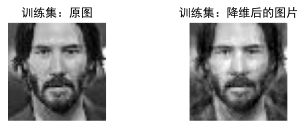

In [29]:
rawImg = data[30].reshape(50,50)
rawImg = Image.fromarray(rawImg)
rawImg = rawImg.convert('L')

inverseData = InversePCAHandwrite(processedTrain, eigenvector_subset, np.mean(data, axis=0))
inverseImg = inverseData[30].reshape(50,50)
print(inverseImg)
inverseImg = Image.fromarray(inverseImg)
inverseImg = inverseImg.convert('L')

fig = plt.figure()
ax0 = fig.add_subplot(221)
ax0.axis('off')
ax0.set_title("训练集：原图")
ax0.imshow(rawImg, cmap = "gray")
ax1 = fig.add_subplot(222)
ax1.axis('off')
ax1.set_title("训练集：降维后的图片")
ax1.imshow(inverseImg, cmap = "gray")

In [17]:
#PCA
pca = PCA(n_components=50)
pca.fit(data)

processedTrain = pca.transform(data)
print("PCA完成，选取前50特征，降维后的数据集大小为：", processedTrain.shape)

PCA完成，选取前50特征，降维后的数据集大小为： (100, 50)


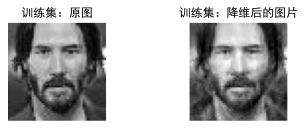

In [18]:
#可视化对比

rawImg = data[30].reshape(50,50)
rawImg = Image.fromarray(rawImg)
rawImg = rawImg.convert('L')

inverseData = pca.inverse_transform(processedTrain)
inverseImg = inverseData[30].reshape(50,50)
inverseImg = Image.fromarray(inverseImg)
inverseImg = inverseImg.convert('L')

fig = plt.figure()
ax0 = fig.add_subplot(221)
ax0.axis('off')
ax0.set_title("训练集：原图")
ax0.imshow(rawImg, cmap = "gray")
ax1 = fig.add_subplot(222)
ax1.axis('off')
ax1.set_title("训练集：降维后的图片")
ax1.imshow(inverseImg, cmap = "gray")

测试照片与 肖战 的平均欧式距离是： 3175.163702632118
测试照片与 泽连斯基 的平均欧式距离是： 3191.486487627255
测试照片与 甄子丹 的平均欧式距离是： 3624.6157260875398
测试照片与 John Wick 的平均欧式距离是： 4223.057001954237
测试照片与 StarLight 的平均欧式距离是： 2095.2828700512755
测试照片与  Lance 的平均欧式距离是： 4979.993099396045
测试照片与 Homelander 的平均欧式距离是： 3720.3081823369293
测试照片与 A-Train 的平均欧式距离是： 4163.320383223269
测试照片与 Billy 的平均欧式距离是： 5223.049169991613
测试照片与 Luke Skywalker 的平均欧式距离是： 4802.31432617342

欧氏距离最小为： 2095.2828700512755 ,即测试照片为： StarLight


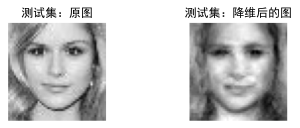

In [19]:
#使用测试集图片进行测试
nameList = ["肖战", "泽连斯基", "甄子丹", "John Wick", "StarLight", " Lance", "Homelander", "A-Train", "Billy", "Luke Skywalker"]
name = 4
img = Image.open("DataProcessed/test/" + str(name) + ".jpg")
imgGray = img.convert('L')
test =  np.array(imgGray).reshape([1, -1])
processedTest = pca.transform(test)
#print(processedTest.shape)
verify = processedTest

#测试照片可视化
rawImg = test.reshape(50,50)
rawImg = Image.fromarray(rawImg)
rawImg = rawImg.convert('L')

inverseData = pca.inverse_transform(processedTest)
inverseImg = inverseData[0].reshape(50,50)
inverseImg = Image.fromarray(inverseImg)
inverseImg = inverseImg.convert('L')

fig = plt.figure()
ax0 = fig.add_subplot(221)
ax0.axis('off')
ax0.set_title("测试集：原图")
ax0.imshow(rawImg, cmap = "gray")
ax1 = fig.add_subplot(222)
ax1.axis('off')
ax1.set_title("测试集：降维后的图")
ax1.imshow(inverseImg, cmap = "gray")

minDis = 1e9
dis = []
for i in range(processedTrain.shape[0]):
    dis.append(d_ou(processedTrain[i],verify[0]))
averageDis = 0
for i in range(len(dis)):
    averageDis = averageDis + dis[i]
    if((i + 1) % 10 == 0):
        averageDis = averageDis/10
        print("测试照片与", nameList[int((i + 1) / 10) - 1],"的平均欧式距离是：", averageDis)
        if(averageDis < minDis):
            minDis = averageDis
            ansName = int((i + 1) / 10) - 1
        averageDis = 0
print("\n欧氏距离最小为：",minDis,",即测试照片为：",nameList[ansName])

选取的测试照片是： A-Train 

测试照片与 肖战 的平均欧式距离是： 4052.809037197518
测试照片与 泽连斯基 的平均欧式距离是： 3850.58468560414
测试照片与 甄子丹 的平均欧式距离是： 4020.440661401107
测试照片与 John Wick 的平均欧式距离是： 4545.483325174279
测试照片与 StarLight 的平均欧式距离是： 3746.9758115075506
测试照片与  Lance 的平均欧式距离是： 3252.7561182409563
测试照片与 Homelander 的平均欧式距离是： 3943.7462592601746
测试照片与 A-Train 的平均欧式距离是： 2727.703887975712
测试照片与 Billy 的平均欧式距离是： 4521.912682270724
测试照片与 Luke Skywalker 的平均欧式距离是： 4266.72145289189

欧氏距离最小为： 2727.703887975712 ,即测试照片预测为： A-Train


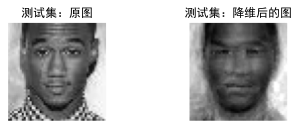

In [20]:
#使用测试集图片进行测试
nameList = ["肖战", "泽连斯基", "甄子丹", "John Wick", "StarLight", " Lance", "Homelander", "A-Train", "Billy", "Luke Skywalker"]
name = 7
img = Image.open("DataProcessed/test/" + str(name) + ".jpg")
imgGray = img.convert('L')
test =  np.array(imgGray).reshape([1, -1])
processedTest = pca.transform(test)
#print(processedTest.shape)
verify = processedTest

#测试照片可视化
rawImg = test.reshape(50,50)
rawImg = Image.fromarray(rawImg)
rawImg = rawImg.convert('L')

inverseData = pca.inverse_transform(processedTest)
inverseImg = inverseData[0].reshape(50,50)
inverseImg = Image.fromarray(inverseImg)
inverseImg = inverseImg.convert('L')

fig = plt.figure()
ax0 = fig.add_subplot(221)
ax0.axis('off')
ax0.set_title("测试集：原图")
ax0.imshow(rawImg, cmap = "gray")
ax1 = fig.add_subplot(222)
ax1.axis('off')
ax1.set_title("测试集：降维后的图")
ax1.imshow(inverseImg, cmap = "gray")


print("选取的测试照片是：", nameList[name],"\n")
minDis = 1e9
dis = []
for i in range(processedTrain.shape[0]):
    dis.append(d_ou(processedTrain[i],verify[0]))
averageDis = 0
for i in range(len(dis)):
    averageDis = averageDis + dis[i]
    if((i + 1) % 10 == 0):
        averageDis = averageDis/10
        print("测试照片与", nameList[int((i + 1) / 10) - 1],"的平均欧式距离是：", averageDis)
        if(averageDis < minDis):
            minDis = averageDis
            ansName = int((i + 1) / 10) - 1
        averageDis = 0
print("\n欧氏距离最小为：",minDis,",即测试照片预测为：",nameList[ansName])


In [30]:
nameList = ["肖战", "泽连斯基", "甄子丹", "John Wick", "StarLight", " Lance", "Homelander", "A-Train", "Billy", "Luke Skywalker"]
for i in range(len(nameList)):
    print(nameList[i])

肖战
泽连斯基
甄子丹
John Wick
StarLight
 Lance
Homelander
A-Train
Billy
Luke Skywalker
